In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

data = pd.read_csv("../../data/data_export.csv")

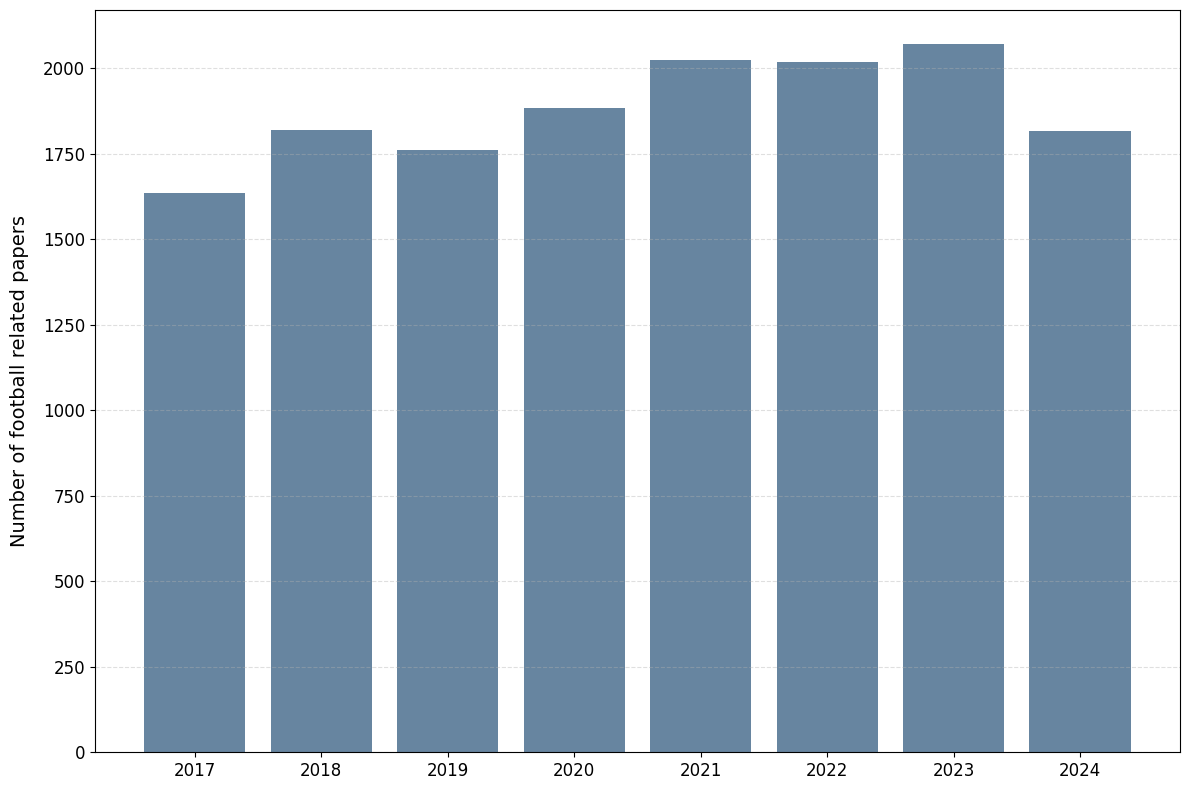

In [23]:
yearly_distribution = data['publication_year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(yearly_distribution.index, yearly_distribution.values, color='#416788', alpha=0.8)

plt.ylabel('Number of football related papers', fontsize=14, labelpad=10)

plt.ylim(0, max(yearly_distribution.values) + 100)

plt.xticks(yearly_distribution.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig("paper_distribution.png", dpi=400)
plt.show()

/var/folders/66/n03tnlzs0fd6bhjtzdb8ztwm0000gn/T/ipykernel_2475/110293790.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')  # Use 'tab10' for distinct categorical colors


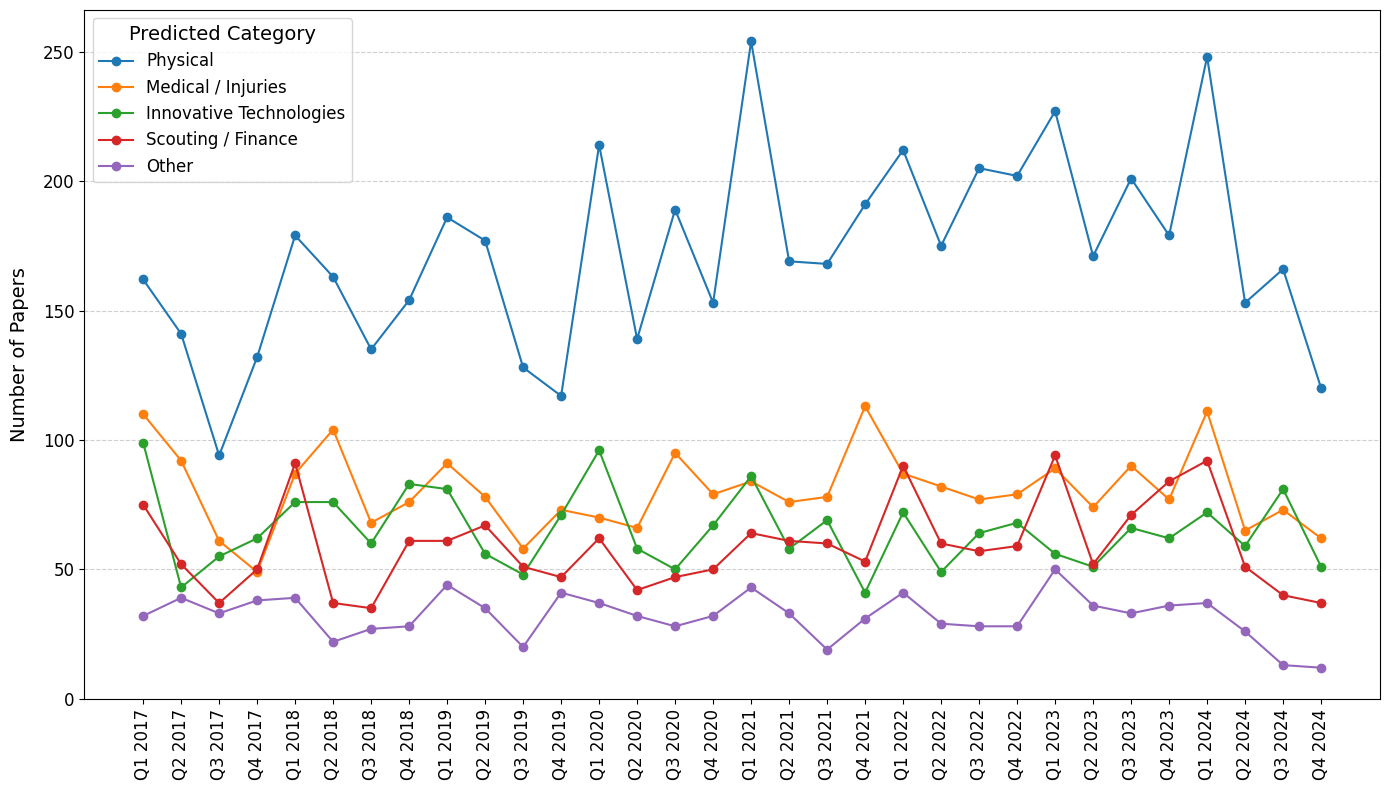

In [43]:
data['predicted_category'] = data['predicted_category'].replace('Physical Attributes', 'Physical')

# Re-calculate the quarterly distribution after the update
quarterly_distribution_updated = data.groupby(['publication_quarter', 'predicted_category']).size().unstack(fill_value=0)

filtered_categories_updated = quarterly_distribution_updated.sum(axis=0).sort_values(ascending=False).head(5).index
filtered_distribution_updated = quarterly_distribution_updated[filtered_categories_updated]


cmap = get_cmap('tab10')  
colors = [cmap(i) for i in range(len(filtered_distribution_updated.columns))]
filtered_distribution_updated.index = filtered_distribution_updated.index.astype(str).str.replace('([0-9]+)Q([0-9])', r'Q\2 \1', regex=True)


plt.figure(figsize=(14, 8))
for idx, category in enumerate(filtered_distribution_updated.columns):
    plt.plot(
        filtered_distribution_updated.index,
        filtered_distribution_updated[category],
        marker='o',
        label=category,
        color=colors[idx]
    )

plt.ylabel('Number of Papers', fontsize=14, labelpad=10)
plt.legend(title="Predicted Category", fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("category_over_time.png", dpi=400)
plt.show()